# Product Survey Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#loads the .csv file and converts it to a DataFrame
survey = pd.read_csv('Untitled form.csv')
survey

,Timestamp,1. How old are you (years)?,2. Please choose your gender.,3. Which state in Nigeria do you live in?,4. What is your employment status?,5. How much is your average monthly earnings (Naira)?,6. What is your most used means of transport?,7. How often do you leave your house (for any purpose)?,8. How do you usually go out for your recreational activities/hang outs?,9. Have you ever been harassed in a public or private space?,...,"15b. If your answer to question 15 or 15a is yes, why?","15c. If your answer to question 15 and 15a is no, why?",16. Did you eventually record the situation with your phone?,"16a. If yes, where you worried about the destruction of your phone?",16b. What worried you the most about using your phone (whether you recorded or not)?,"17. If cheaper devices were made just for recording such a scenario, would you buy for back up purposes?",18. How much will you be comfortable with paying for such a product (Naira)?,"19. Assuming the price of such a product is outside your comfort range, what's the maximum amount you would not be willing to go above?",20. How comfortable will you be if you/others were to have this device on everywhere you went?,21. What other situations do you think such a product would prove useful?
0,2021/02/19 12:09:45 AM PST,21 - 25,Male,Lagos,Freelancer,"Less than 250,000","Commercial private vehicle (like uber, bolt, d...",Neutral,With friends,Yes,...,Accountability,NaN,No,NaN,Expense of getting a new phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",NaN,Not just abuse or harrasment. Any ill of the s...
1,2021/02/19 12:48:58 AM PST,21 - 25,Female,Lagos,Full-time employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Every Time,With friends,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/02/19 12:49:51 AM PST,21 - 25,Female,Akwa Ibom,Unemployed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Neutral,With friends,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/02/19 12:51:14 AM PST,21 - 25,Male,Lagos,Full-time employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,By yourself,No,...,NaN,NaN,No,Yes,Loss of important files in phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",NaN,NaN
4,2021/02/19 12:52:50 AM PST,21 - 25,Female,Lagos,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Neutral,With friends,Yes,...,NaN,Fear for your life,No,NaN,Expense of getting a new phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",NaN,During an accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2021/02/22 6:01:42 PM PST,21 - 25,Female,Lagos,Full-time employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,With friends,Yes,...,NaN,Didn't feel it was necessary,No,NaN,Loss of important files in phone if destroyed,Maybe,"5,000 - 19,999","5,000 - 19,999",Very comfortable,NaN
138,2021/02/23 5:12:37 PM PST,21 - 25,Female,Delta,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,By yourself,Yes,...,Accountability,NaN,No,NaN,Loss of important files in phone if destroyed,Yes,"5,000 - 19,999","35,000 - 49,999",Very comfortable,NaN
139,2021/02/25 7:54:41 AM PST,26 - 30,Male,Abia,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Every Time,With friends,Yes,...,NaN,Fear for your life,No,No,Loss of important files in phone if destroyed,Maybe,"5,000 - 19,999","5,000 - 19,999",Very comfortable,As a dashboard camera.
140,2021/02/25 12:45:32 PM PST,26 - 30,Male,Rivers,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,With friends,No,...,Online awareness,NaN,No,No,Loss of important files in phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",Neutral,Police check point


In [2]:
survey = survey.iloc[:,1:] #gets rid of the timestamp column, which is the first column. It isn't necessary in this analysis.

#numbers each column in the DataFrame, so they can be replace. Either command could be used.
survey_title = dict(enumerate(list(survey.columns)))
#survey_title = dict(zip(range(len(survey.columns)), survey.columns))

survey_title

{0: '1. How old are you (years)?',
 1: '2. Please choose your gender.',
 2: '3. Which state in Nigeria do you live in?',
 3: '4. What is your employment status?',
 4: '5. How much is your average monthly earnings (Naira)?',
 5: '6. What is your most used means of transport?',
 6: '7. How often do you leave your house (for any purpose)?',
 7: '8. How do you usually go out for your recreational activities/hang outs?',
 8: '9. Have you ever been harassed in a public or private space?',
 9: "10. Considering one of the most significant confrontations you've had, how populated was the area?",
 10: '11. What was the nature of this confrontation?',
 11: '12. Were you at any point during this confrontation worried about your safety or that of your property?',
 12: '13. Were you alone or with someone familiar during this confrontation?',
 13: '14. Do you think if the harasser(s) felt they were being watched, or evidence of their actions could be used against them, they would have acted different

In [3]:
#replaces the columns titles with corresponding numerical values, from the enumerated dictionary (survey_title)
survey.columns = survey_title.keys()
survey

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,21 - 25,Male,Lagos,Freelancer,"Less than 250,000","Commercial private vehicle (like uber, bolt, d...",Neutral,With friends,Yes,Very scarcely populated,...,Accountability,NaN,No,NaN,Expense of getting a new phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",NaN,Not just abuse or harrasment. Any ill of the s...
1,21 - 25,Female,Lagos,Full-time employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Every Time,With friends,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21 - 25,Female,Akwa Ibom,Unemployed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Neutral,With friends,Yes,Scarcely populated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21 - 25,Male,Lagos,Full-time employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,By yourself,No,NaN,...,NaN,NaN,No,Yes,Loss of important files in phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",NaN,NaN
4,21 - 25,Female,Lagos,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Neutral,With friends,Yes,Scarcely populated,...,NaN,Fear for your life,No,NaN,Expense of getting a new phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",NaN,During an accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,21 - 25,Female,Lagos,Full-time employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,With friends,Yes,Very populated,...,NaN,Didn't feel it was necessary,No,NaN,Loss of important files in phone if destroyed,Maybe,"5,000 - 19,999","5,000 - 19,999",Very comfortable,NaN
138,21 - 25,Female,Delta,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,By yourself,Yes,Moderately populated,...,Accountability,NaN,No,NaN,Loss of important files in phone if destroyed,Yes,"5,000 - 19,999","35,000 - 49,999",Very comfortable,NaN
139,26 - 30,Male,Abia,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Every Time,With friends,Yes,Scarcely populated,...,NaN,Fear for your life,No,No,Loss of important files in phone if destroyed,Maybe,"5,000 - 19,999","5,000 - 19,999",Very comfortable,As a dashboard camera.
140,26 - 30,Male,Rivers,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,With friends,No,Moderately populated,...,Online awareness,NaN,No,No,Loss of important files in phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",Neutral,Police check point


In [4]:
#displays the basic overview of each coluumns. The row titles are the description of what each cell contains with respect to each column.
survey.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,142,142,142,142,142,142,142,142,142,127,...,57,72,119,47,93,120,120,120,49,70
unique,6,2,14,5,4,4,4,4,2,4,...,4,5,2,2,3,3,6,7,5,67
top,21 - 25,Male,Rivers,Self employed,"Less than 250,000","Commercial public vehicle (like buses, shared ...",Almost Every Time,With friends,Yes,Moderately populated,...,Accountability,Didn't feel it was necessary,No,No,Loss of important files in phone if destroyed,Yes,"less than 5,000","5,000 - 19,999",Very comfortable,In a robbery case
freq,77,80,74,41,125,99,67,96,95,56,...,28,25,113,30,46,71,66,59,23,2


## Single Feature Vector Analysis

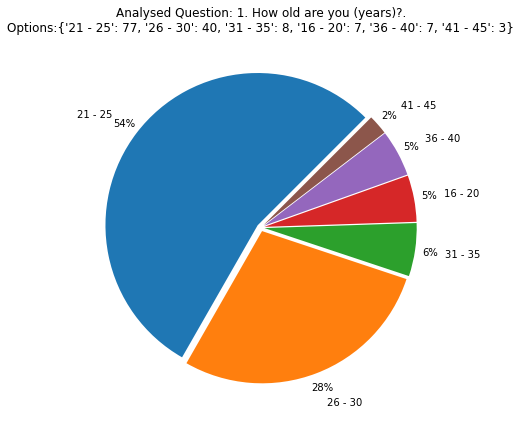

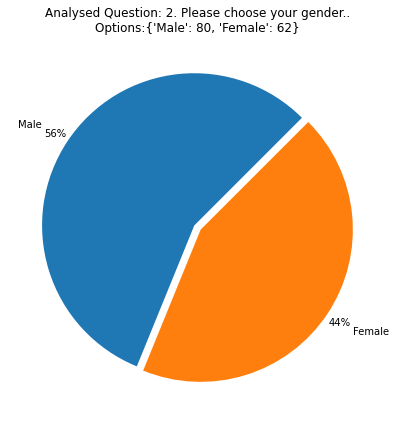

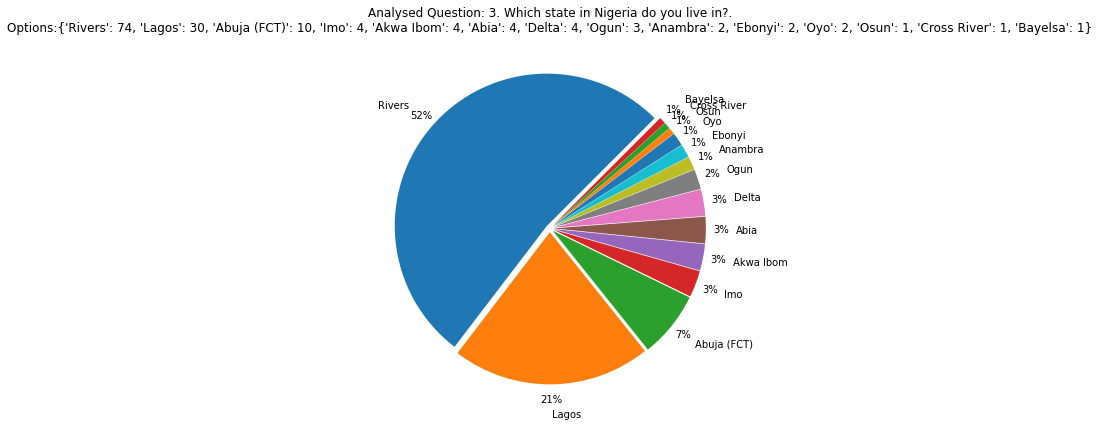

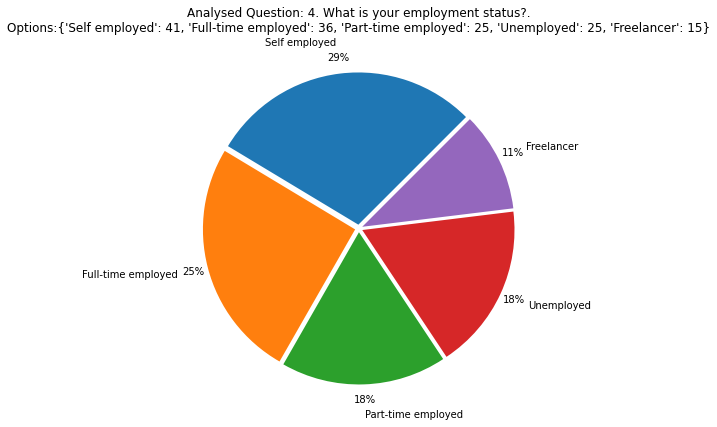

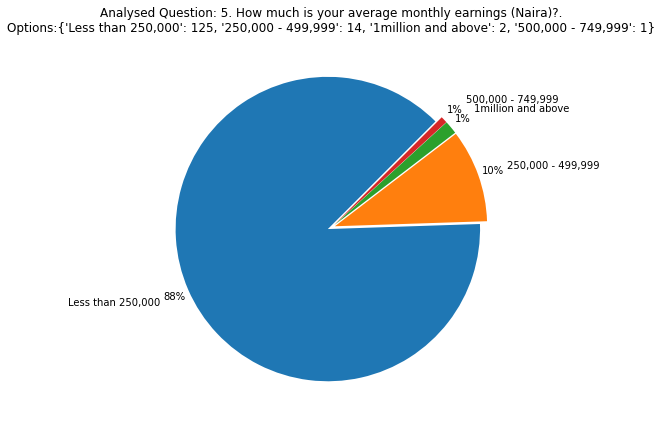

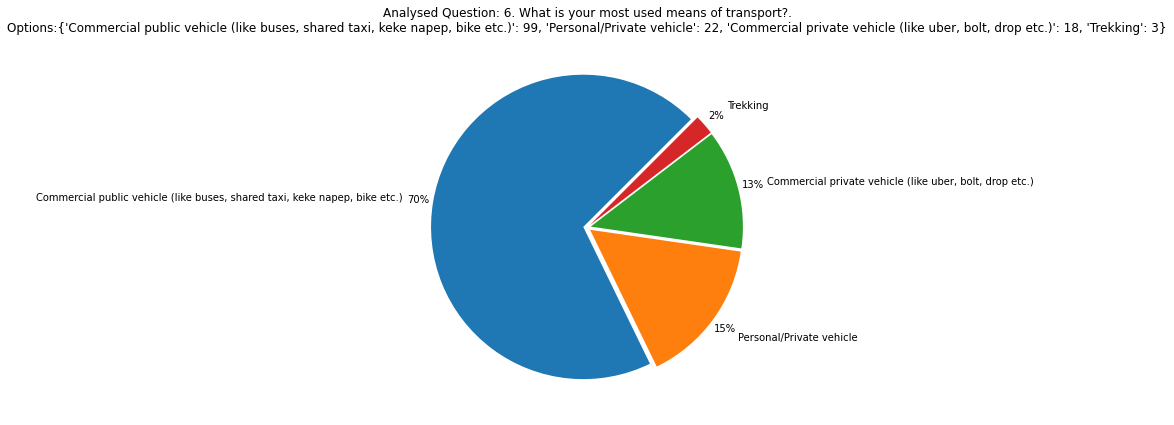

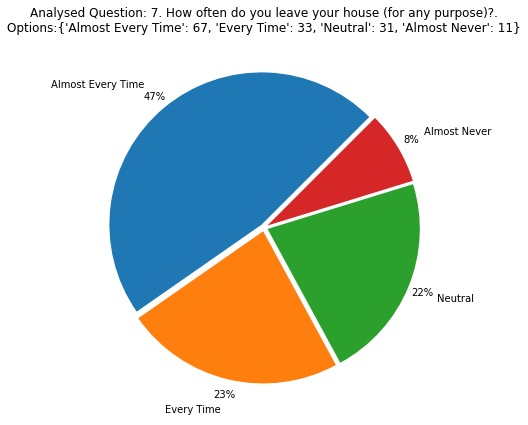

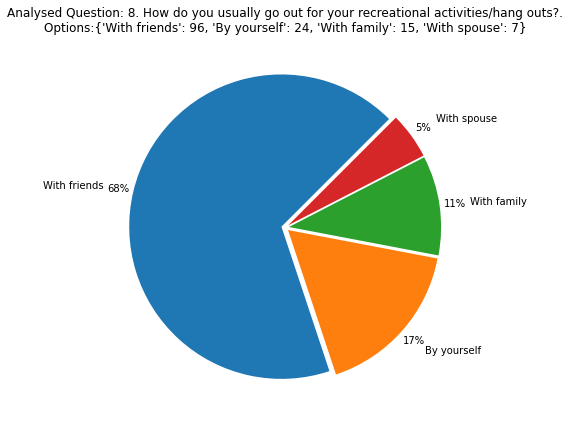

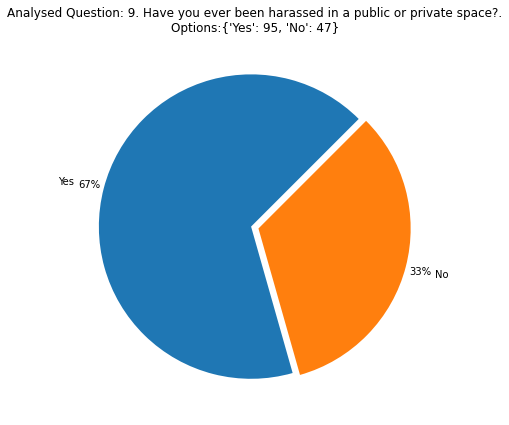

In [82]:
rnge = range(0,9)
def column_descr(dataframe, rnge, survey_title = survey_title):
    '''Takes in a certain range of columns from the dataframe and counts the occurence of each answer presented'''
    descrb, col_title = [], []
    for x in rnge:
        col_title.append(survey_title[x])
        descrb.append(dict(dataframe[x].value_counts()))
        descr = dict(zip(col_title, descrb))
    return(descr)

demogr = column_descr(survey, rnge)
count = 0
for key, value in demogr.items():
    #print(key, ' : ', value)
    count += 1
    title = 'Analysed Question: {}.'.format(key)
    options = 'Options:{}'.format(value)
    explode = (np.ones(len(value.values())))*0.025
    figname = '0{}_Question_{}'.format(count, (list(survey_title.values()).index(key))+1)
    figname = figname + '.jpg'
    plt.figure(figsize=(10, 7))
    plt.pie(value.values(), labels=value.keys(), autopct='%1.0f%%', explode=explode, startangle=45, pctdistance=1.1, labeldistance=1.2)
    plt.title('{}\n{}'.format(title, options))
    plt.savefig(figname)
    #plt.close()
    #plt.show()

## Analysis of Two Feature Vectors simultaneously

In [83]:
def deep_column_descr(dataframe, target_column, descr_column):
    """
    This function analyses a column (descr_column) with repsect to another column(target_column). Now assuming the target column 
    is a yes or no question, the function takes in a described column(descr_column) and finds out how many respondents answered 
    yes and how many answered no, under each unique category in that described column.
    
    INPUT/ARGS: dataframe(survey), target column, described column
    
    BODY: Gets the unique categories in the described column in a list and then loops through the items in that list. For each
    item parsed through the loop in the list, it sheds off the rows associated with all other items from the dataframe. Then 
    counts the number of occurences of each unique category in the target column, for whatever is left of the dataframe.
    
    After this, it converts the value_count to a dictionary and appends it to the counts list. When the target columns has been 
    examined for all the unique items in the described column, it then zips the unique items in the described column to its
    corresponding value_count of the target column.
    
    OUTPUT/RETURNS:
        deep_col_descr (dictionary): A dictionary containing the unique items in the described column, with their corresponding
        value_count of the target column.
    """
    opts = list(dataframe[descr_column].unique())
    counts = []
    loc = 0
    plots = []
    for option in opts:
        df = dataframe[dataframe[descr_column] == option]
        counts.append(dict(df[target_column].value_counts()))
        plots.append([loc])
        loc += 1
    deep_col_descr = dict(zip(opts, counts))
    return (deep_col_descr, plots)

def col_anal (survey, survey_title, target_column, descr_column):
    """
    This function takes in the dataframe, column titles, the target column and described column, and then invokes the deep column
    description function, to do the value count. Depending on the intention for the function, it either uses the target column
    to analyse the described columns, or inverts the process.

    """
    length = [len(target_column), len(descr_column)]
    col_descr_set = []
    if length.index(max(length)) == 1 or length[0] == length[1]:
        target_column = target_column[0]
        for descr_column in descr_column:
            deep_col_descr, plot_loc = deep_column_descr(survey, target_column, descr_column)
            col_descr_set.append([survey_title[descr_column], survey_title[target_column], deep_col_descr, plot_loc])
            print('Described Column: {}\nTarget Column: {}\n{}\nPlot Locations: {}\n'.format(survey_title[descr_column], survey_title[target_column], deep_col_descr, plot_loc))
    elif length.index(max(length)) == 0:
        descr_column = descr_column[0]
        for target_column in target_column:
            deep_col_descr, plot_loc = deep_column_descr(survey_1, target_column, descr_column)
            col_descr_set.append([survey_title[descr_column], survey_title[target_column], deep_col_descr, plot_loc])
            print('Described Column: {}\nTarget Column: {}\n{}\nPlot Locations: {}\n'.format(survey_title[descr_column], survey_title[target_column], deep_col_descr, plot_loc))
    return(col_descr_set)

def plot_func_1(col_descr_set, survey_title):
    #or I could simply store the location of the dictionary containing the value_count so as to locate and plot it later.
    count = 0
    for plot in col_descr_set[3]:
        lists = col_descr_set[2]
        count += 1
        for p in range(len(plot)):
            lists_key = list(lists.keys())[plot[p]]
            lists = list(lists.values())[plot[p]]
            title1 = 'Described Question: {}  Answer: {}.'.format(col_descr_set[0], lists_key)
            if p == len(plot)-1:
                title2 = 'Analysed Question: {}.'.format(col_descr_set[1])
                options = 'Options:{}'.format(lists)
                explode = (np.ones(len(lists.values())))*0.025
                figname = '0{}_Question_{}_and_Question_{}'.format(count, (list(survey_title.values()).index(col_descr_set[0]))+1, (list(survey_title.values()).index(col_descr_set[1]))+1)
                figname = figname + '.jpg'
                plt.figure(figsize=(10, 7))
                plt.pie(lists.values(), labels=lists.keys(), autopct='%1.0f%%', explode=explode, startangle=45, pctdistance=1.1, labeldistance=1.2)
                plt.title('{}\n{}\n{}'.format(title1, title2, options))
                plt.savefig(figname)
                #plt.close()
                #plt.show()

In [36]:
descr_column = range(7)
target_column = [8]
col_descr_set = col_anal(survey, survey_title, target_column, descr_column)

Described Column: 1. How old are you (years)?
Target Column: 9. Have you ever been harassed in a public or private space?
{'21 - 25': {'Yes': 54, 'No': 23}, '26 - 30': {'Yes': 26, 'No': 14}, '16 - 20': {'No': 4, 'Yes': 3}, '36 - 40': {'Yes': 6, 'No': 1}, '31 - 35': {'Yes': 5, 'No': 3}, '41 - 45': {'No': 2, 'Yes': 1}}
Plot Locations: [[0], [1], [2], [3], [4], [5]]

Described Column: 2. Please choose your gender.
Target Column: 9. Have you ever been harassed in a public or private space?
{'Male': {'Yes': 48, 'No': 32}, 'Female': {'Yes': 47, 'No': 15}}
Plot Locations: [[0], [1]]

Described Column: 3. Which state in Nigeria do you live in?
Target Column: 9. Have you ever been harassed in a public or private space?
{'Lagos': {'Yes': 20, 'No': 10}, 'Akwa Ibom': {'Yes': 3, 'No': 1}, 'Imo': {'Yes': 3, 'No': 1}, 'Rivers': {'Yes': 52, 'No': 22}, 'Oyo': {'Yes': 2}, 'Ogun': {'No': 2, 'Yes': 1}, 'Delta': {'Yes': 4}, 'Osun': {'Yes': 1}, 'Abuja (FCT)': {'No': 7, 'Yes': 3}, 'Ebonyi': {'Yes': 2}, 'Anam

In [75]:
with open('col_descr_set.txt', 'w') as file_handler:
    for item in col_descr_set:
        file_handler.write("{}\n".format(item))
        
col_descr_set

[['1. How old are you (years)?',
  '9. Have you ever been harassed in a public or private space?',
  {'21 - 25': {'Yes': 54, 'No': 23},
   '26 - 30': {'Yes': 26, 'No': 14},
   '16 - 20': {'No': 4, 'Yes': 3},
   '36 - 40': {'Yes': 6, 'No': 1},
   '31 - 35': {'Yes': 5, 'No': 3},
   '41 - 45': {'No': 2, 'Yes': 1}},
  [[0], [1], [2], [3], [4], [5]]],
 ['2. Please choose your gender.',
  '9. Have you ever been harassed in a public or private space?',
  {'Male': {'Yes': 48, 'No': 32}, 'Female': {'Yes': 47, 'No': 15}},
  [[0], [1]]],
 ['3. Which state in Nigeria do you live in?',
  '9. Have you ever been harassed in a public or private space?',
  {'Lagos': {'Yes': 20, 'No': 10},
   'Akwa Ibom': {'Yes': 3, 'No': 1},
   'Imo': {'Yes': 3, 'No': 1},
   'Rivers': {'Yes': 52, 'No': 22},
   'Oyo': {'Yes': 2},
   'Ogun': {'No': 2, 'Yes': 1},
   'Delta': {'Yes': 4},
   'Osun': {'Yes': 1},
   'Abuja (FCT)': {'No': 7, 'Yes': 3},
   'Ebonyi': {'Yes': 2},
   'Anambra': {'No': 1, 'Yes': 1},
   'Abia': {'No

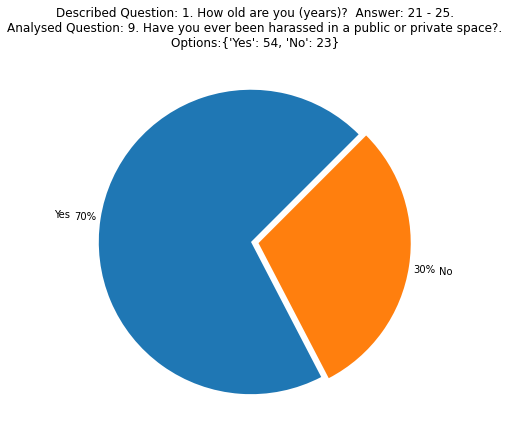

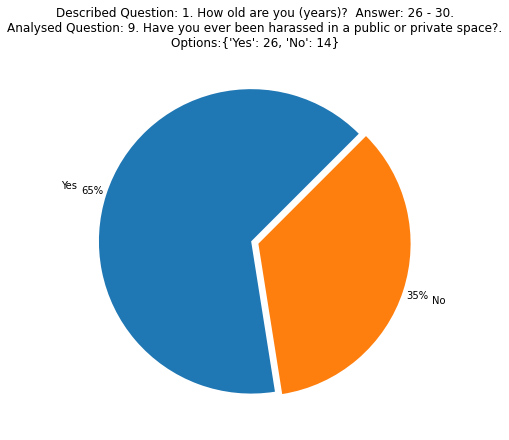

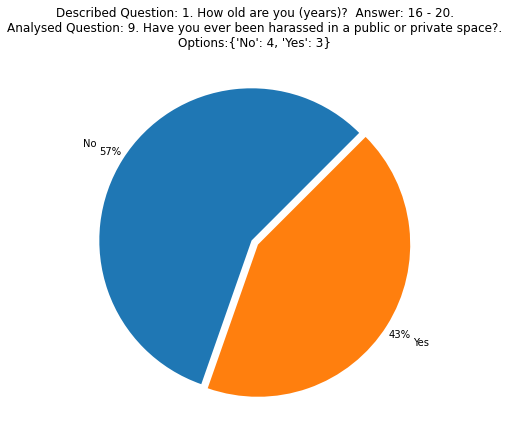

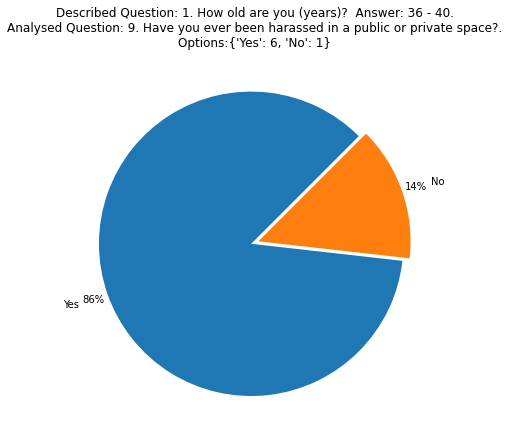

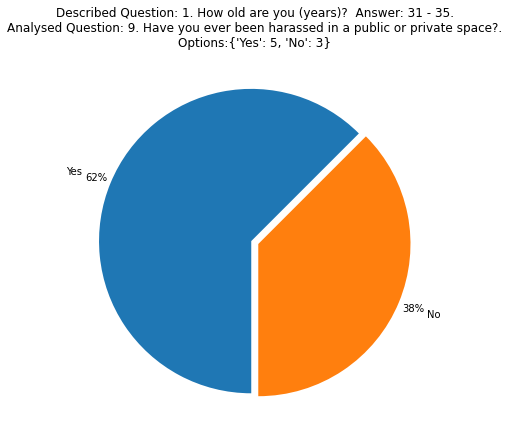

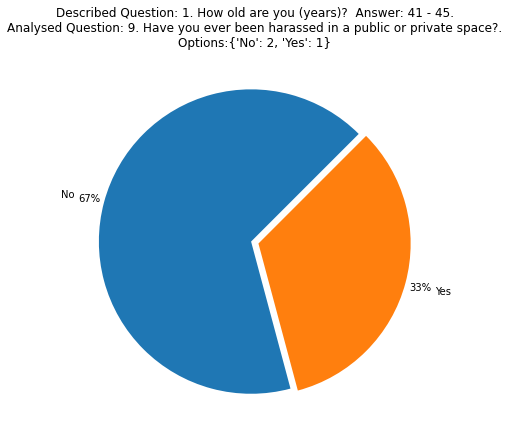

In [84]:
plot_func_1(col_descr_set[0], survey_title)

In [10]:
#Shedding off those that haven't been harassed, so as to focus the analysis on those that have been harassed.
survey_1 = survey[survey[8] == 'Yes']

#I simply flipped the effect of the function. Hence, finding the number of occurences for all unique categories in other columns
#for only those that answered yes to having been harrassed.
descr_column = [8]
target_column = [x for x in range(len(survey.columns)-1) if x not in [8, 19, 20]]
col_descr_set = col_anal(survey_1, survey_title, target_column, descr_column)

Described Column: 9. Have you ever been harassed in a public or private space?
Target Column: 1. How old are you (years)?
{'Yes': {'21 - 25': 54, '26 - 30': 26, '36 - 40': 6, '31 - 35': 5, '16 - 20': 3, '41 - 45': 1}}
Plot Locations: [[0]]

Described Column: 9. Have you ever been harassed in a public or private space?
Target Column: 2. Please choose your gender.
{'Yes': {'Male': 48, 'Female': 47}}
Plot Locations: [[0]]

Described Column: 9. Have you ever been harassed in a public or private space?
Target Column: 3. Which state in Nigeria do you live in?
{'Yes': {'Rivers': 52, 'Lagos': 20, 'Delta': 4, 'Imo': 3, 'Akwa Ibom': 3, 'Abuja (FCT)': 3, 'Abia': 2, 'Ebonyi': 2, 'Oyo': 2, 'Osun': 1, 'Ogun': 1, 'Anambra': 1, 'Bayelsa': 1}}
Plot Locations: [[0]]

Described Column: 9. Have you ever been harassed in a public or private space?
Target Column: 4. What is your employment status?
{'Yes': {'Self employed': 26, 'Full-time employed': 23, 'Part-time employed': 18, 'Unemployed': 16, 'Freelancer

In [11]:
col_descr_set

[['9. Have you ever been harassed in a public or private space?',
  '1. How old are you (years)?',
  {'Yes': {'21 - 25': 54,
    '26 - 30': 26,
    '36 - 40': 6,
    '31 - 35': 5,
    '16 - 20': 3,
    '41 - 45': 1}},
  [[0]]],
 ['9. Have you ever been harassed in a public or private space?',
  '2. Please choose your gender.',
  {'Yes': {'Male': 48, 'Female': 47}},
  [[0]]],
 ['9. Have you ever been harassed in a public or private space?',
  '3. Which state in Nigeria do you live in?',
  {'Yes': {'Rivers': 52,
    'Lagos': 20,
    'Delta': 4,
    'Imo': 3,
    'Akwa Ibom': 3,
    'Abuja (FCT)': 3,
    'Abia': 2,
    'Ebonyi': 2,
    'Oyo': 2,
    'Osun': 1,
    'Ogun': 1,
    'Anambra': 1,
    'Bayelsa': 1}},
  [[0]]],
 ['9. Have you ever been harassed in a public or private space?',
  '4. What is your employment status?',
  {'Yes': {'Self employed': 26,
    'Full-time employed': 23,
    'Part-time employed': 18,
    'Unemployed': 16,
    'Freelancer': 12}},
  [[0]]],
 ['9. Have you ev

In [12]:
descr_column = [18]
target_column = [19, 20]
col_descr_set = col_anal(survey_1, survey_title, target_column, descr_column)

Described Column: 16. Did you eventually record the situation with your phone?
Target Column: 16a. If yes, where you worried about the destruction of your phone?
{'No': {'No': 19, 'Yes': 10}, nan: {}, 'Yes': {'Yes': 2, 'No': 1}}
Plot Locations: [[0], [1], [2]]

Described Column: 16. Did you eventually record the situation with your phone?
Target Column: 16b. What worried you the most about using your phone (whether you recorded or not)?
{'No': {'Expense of getting a new phone if destroyed': 29, 'Loss of important files in phone if destroyed': 29, 'Loss of the recorded video (evidence) in phone if destroyed': 9}, nan: {}, 'Yes': {'Loss of important files in phone if destroyed': 2, 'Expense of getting a new phone if destroyed': 1}}
Plot Locations: [[0], [1], [2]]



In [13]:
col_descr_set

[['16. Did you eventually record the situation with your phone?',
  '16a. If yes, where you worried about the destruction of your phone?',
  {'No': {'No': 19, 'Yes': 10}, nan: {}, 'Yes': {'Yes': 2, 'No': 1}},
  [[0], [1], [2]]],
 ['16. Did you eventually record the situation with your phone?',
  '16b. What worried you the most about using your phone (whether you recorded or not)?',
  {'No': {'Expense of getting a new phone if destroyed': 29,
    'Loss of important files in phone if destroyed': 29,
    'Loss of the recorded video (evidence) in phone if destroyed': 9},
   nan: {},
   'Yes': {'Loss of important files in phone if destroyed': 2,
    'Expense of getting a new phone if destroyed': 1}},
  [[0], [1], [2]]]]

## Further test codes_Analysis of 3 feature vectors

In [14]:
def deep_column_descr_1(dataframe, target_column, descr_column, descr_column_1):
    """
    This function analyses a column (descr_column) with repsect to another column(target_column). Now assuming the target column 
    is a yes or no question, the function takes in a described column(descr_column) and finds out how many respondents answered 
    yes and how many answered no, under each unique category in that described column.
    
    INPUT/ARGS: dataframe(survey), target column, described column
    
    BODY: Gets the unique categories in the described column in a list and then loops through the items in that list. For each
    item parsed through the loop in the list, it sheds off the rows associated with all other items from the dataframe. Then 
    counts the number of occurences of each unique category in the target column, for whatever is left of the dataframe.
    
    After this, it converts the value_count to a dictionary and appends it to the counts list. When the target columns has been 
    examined for all the unique items in the described column, it then zips the unique items in the described column to its
    corresponding value_count of the target column.
    
    OUTPUT/RETURNS:
        deep_col_descr (dictionary): A dictionary containing the unique items in the described column, with their corresponding
        value_count of the target column.
    """
    opts = list(dataframe[descr_column].unique())
    opts_1 = list(dataframe[descr_column_1].unique())
    counts = []
    loc = 0
    plots = []
    for option in opts:
        df = dataframe[dataframe[descr_column] == option]
        counts_1 = []
        loc_1 = 0
        for option_1 in opts_1:
            df_1 = df[df[descr_column_1] == option_1]
            counts_1.append(dict(df_1[target_column].value_counts()))
            plots.append([loc, loc_1])
            loc_1 += 1
        counts.append(dict(zip(opts_1, counts_1)))
        loc += 1
    deep_col_descr = dict(zip(opts, counts))
    return (deep_col_descr, plots)

descr_column = [1]
descr_column_1 = 8
target_column = 21
for descr_column in descr_column:
    deep_col_descr, plot_loc = deep_column_descr_1(survey, target_column, descr_column, descr_column_1)
    print('Described Column: {}\nDescribed Column 2: {}\nTarget Column: {}\n{}\nPlot Locations: {}\n'.format(survey_title[descr_column], survey_title[descr_column_1], survey_title[target_column], deep_col_descr, plot_loc))

Described Column: 2. Please choose your gender.
Described Column 2: 9. Have you ever been harassed in a public or private space?
Target Column: 17. If cheaper devices were made just for recording such a scenario, would you buy for back up purposes?
{'Male': {'Yes': {'Yes': 22, 'Maybe': 19, 'No': 3}, 'No': {'Yes': 17, 'Maybe': 8, 'No': 1}}, 'Female': {'Yes': {'Yes': 28, 'Maybe': 16}, 'No': {'Yes': 4, 'Maybe': 2}}}
Plot Locations: [[0, 0], [0, 1], [1, 0], [1, 1]]



In [15]:
descr_cols = [descr_column, descr_column_1]

def plot_func_1(descr_col, plot_loc, deep_col_descr):
    for plot in plot_loc:
        lists = deep_col_descr
        for p in range(len(plot)):
            lists_1 = list(lists.keys())[plot[p]]
            lists = list(lists.values())[plot[p]]
            print('Question {}: {}  Answer: {}.'.format(plot[p]+1, survey_title[descr_cols[p]], lists_1))
            if p == len(plot)-1:
                print('Analysed Question: {}  Options: {}.'.format(survey_title[target_column], lists))
                explode = (np.ones(len(lists.values())))*0.025
                figs = plt.figure()
                plt.pie(lists.values(), labels=lists.keys(), autopct='%1.0f%%', explode=explode, startangle=45)
                #plt.close()
                plt.show()


#I could either plot each value_count after having concluded a set
#or I could simply store the location of the dictionary containing the value_count so as to locate and plot it later.

In [16]:
# Save graph.
plt.figure()
model_org = dict(Cars93['Origin'].value_counts())
plt.pie(model_org.values(), labels=model_org.keys(), autopct='%1.0f%%')
#plt.show()
plt.savefig('Udemy_savedfig.jpg')

NameError: name 'Cars93' is not defined

<Figure size 432x288 with 0 Axes>

In [19]:
x = 'a{}, b{}\n'.format(1, 2)
x = x + x
x

'a1, b2\na1, b2\n'